# КЛАССИФИКАЦИЯ С ПОМОЩЬЮ ПЕРСЕПТРОНА


Цель работы: изучение модели нейрона персептрона и архитектуры персептронной однослойной нейронной сети; создание
и исследование моделей персептронных нейронных сетей

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
np.random.seed(13)

# Определение 2 устойчивых состояний (максимум 0.14 * N = 0.42 → 2 образа)
patterns = np.array([
    [1, -1, 1],
    [-1, 1, -1]
], dtype=float)

print("Устойчивые состояния сети Хопфилда (вариант 13, размерность=3):")
for i, p in enumerate(patterns):
    print(f"  Образ {i+1}: {p}")

# Обучение по правилу Хебба
def train_hopfield(patterns):
    n = patterns.shape[1]
    weights = np.zeros((n, n))
    for p in patterns:
        weights += np.outer(p, p)
    np.fill_diagonal(weights, 0)  # Обнуляем диагональ
    weights /= patterns.shape[0]
    return weights

weights = train_hopfield(patterns)
print("\nМатрица весов (симметричная):")
print(weights)

# Динамика сети (асинхронное обновление)
def recall_hopfield(weights, input_pattern, max_steps=20):
    state = input_pattern.copy()
    history = [state.copy()]
    
    for step in range(max_steps):
        # Асинхронное обновление (случайный порядок нейронов)
        for i in np.random.permutation(len(state)):
            activation = np.dot(weights[i], state)
            state[i] = 1 if activation >= 0 else -1
        
        history.append(state.copy())
        
        # Проверка на сходимость
        if np.array_equal(history[-1], history[-2]):
            break
    
    return np.array(history)

Устойчивые состояния сети Хопфилда (вариант 13, размерность=3):
  Образ 1: [ 1. -1.  1.]
  Образ 2: [-1.  1. -1.]

Матрица весов (симметричная):
[[ 0. -1.  1.]
 [-1.  0. -1.]
 [ 1. -1.  0.]]


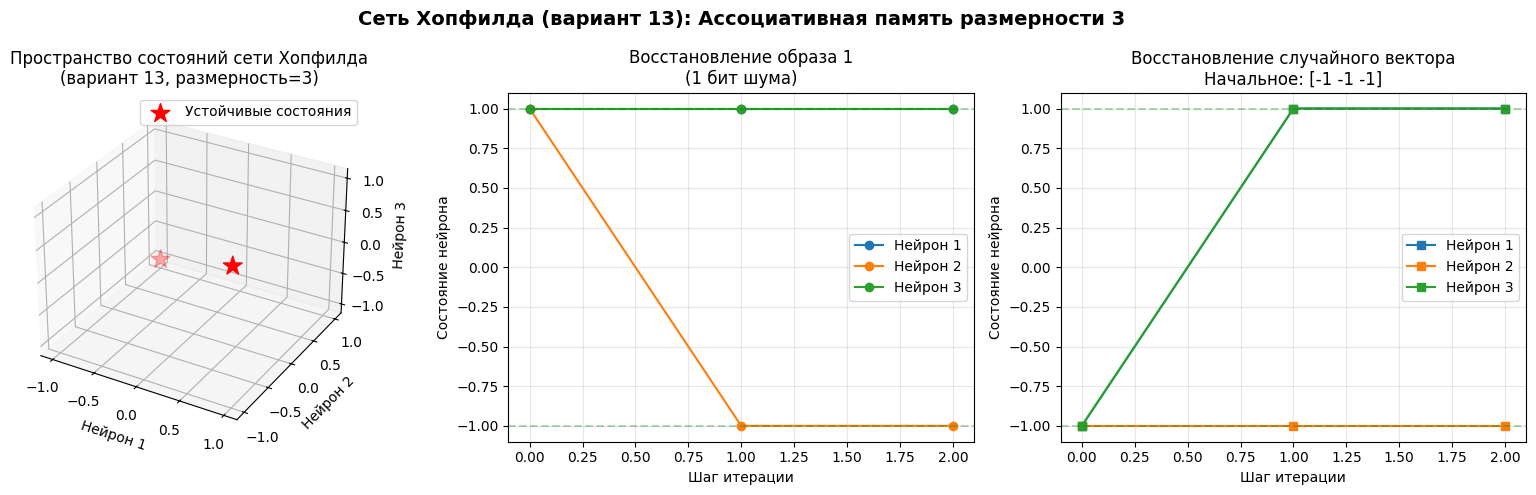


Статистика работы сети Хопфилда (вариант 13):
  Максимальное число запоминаемых образов: 0
  Запомнено образов: 2
  Коэффициент заполнения: 66.67%
  Успешное восстановление: 100/100 (100%)

Примеры восстановления образов:
  Исходный образ 1               [ 1. -1.  1.] → [ 1. -1.  1.] ✓
  Зашумленный образ 1 (1 бит)    [1 1 1] → [ 1 -1  1] ✓
  Исходный образ 2               [-1.  1. -1.] → [-1.  1. -1.] ✓
  Зашумленный образ 2 (2 бита)   [ 1  1 -1] → [-1  1 -1] ✓
  Случайный вектор               [-1 -1 -1] → [ 1 -1  1] ✓


In [4]:
# Тестирование сети на зашумленных образах
fig = plt.figure(figsize=(16, 5))

# 3D визуализация пространства состояний
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(patterns[:, 0], patterns[:, 1], patterns[:, 2], 
           c='red', s=200, marker='*', label='Устойчивые состояния')
ax1.set_xlabel('Нейрон 1')
ax1.set_ylabel('Нейрон 2')
ax1.set_zlabel('Нейрон 3')
ax1.set_title('Пространство состояний сети Хопфилда\n(вариант 13, размерность=3)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Тест 1: восстановление зашумленного образа 1
ax2 = fig.add_subplot(132)
noisy_input1 = patterns[0].copy()
noisy_input1[1] *= -1  # Инвертируем 1 бит (33% шума)

history1 = recall_hopfield(weights, noisy_input1)
steps1 = np.arange(len(history1))
for i in range(3):
    ax2.plot(steps1, history1[:, i], 'o-', label=f'Нейрон {i+1}')
ax2.axhline(y=1, color='g', linestyle='--', alpha=0.3)
ax2.axhline(y=-1, color='g', linestyle='--', alpha=0.3)
ax2.set_xlabel('Шаг итерации')
ax2.set_ylabel('Состояние нейрона')
ax2.set_title('Восстановление образа 1\n(1 бит шума)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Тест 2: восстановление случайного вектора
ax3 = fig.add_subplot(133)
random_input = np.random.choice([-1, 1], size=3)
history2 = recall_hopfield(weights, random_input)

steps2 = np.arange(len(history2))
for i in range(3):
    ax3.plot(steps2, history2[:, i], 's-', label=f'Нейрон {i+1}')
ax3.axhline(y=1, color='g', linestyle='--', alpha=0.3)
ax3.axhline(y=-1, color='g', linestyle='--', alpha=0.3)
ax3.set_xlabel('Шаг итерации')
ax3.set_ylabel('Состояние нейрона')
ax3.set_title(f'Восстановление случайного вектора\nНачальное: {random_input}')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.suptitle('Сеть Хопфилда (вариант 13): Ассоциативная память размерности 3', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Статистика восстановления
print("\nСтатистика работы сети Хопфилда (вариант 13):")
print(f"  Максимальное число запоминаемых образов: {int(0.14 * 3)}")
print(f"  Запомнено образов: {len(patterns)}")
print(f"  Коэффициент заполнения: {len(patterns)/3:.2%}")

# Тестирование на 100 случайных векторах
correct_recovery = 0
for _ in range(100):
    test_vec = np.random.choice([-1, 1], size=3)
    result = recall_hopfield(weights, test_vec)[-1]
    if any(np.array_equal(result, p) for p in patterns):
        correct_recovery += 1

print(f"  Успешное восстановление: {correct_recovery}/100 ({correct_recovery}%)\n")

# Демонстрация восстановления конкретных примеров
test_cases = [
    ("Исходный образ 1", patterns[0]),
    ("Зашумленный образ 1 (1 бит)", np.array([1, 1, 1])),  # инвертирован 2-й бит
    ("Исходный образ 2", patterns[1]),
    ("Зашумленный образ 2 (2 бита)", np.array([1, 1, -1])),  # инвертированы 1-й и 2-й биты
    ("Случайный вектор", np.array([-1, -1, -1]))
]

print("Примеры восстановления образов:")
for name, vec in test_cases:
    result = recall_hopfield(weights, vec)[-1]
    match = any(np.array_equal(result, p) for p in patterns)
    print(f"  {name:30s} {vec} → {result} {'✓' if match else '✗'}")